# Data visualization for [CT Crime Trends](https://projects.ctmirror.org/content/2017/9/fbi-crime-data/)


In [1]:
import pandas as pd

In [2]:
import re
def fixname(name):
    #print name
    ret =  re.sub(r'[^A-Za-z ]+',"",str(name).title())
    #print name, "->", ret
    #return ret
    return ret

fixname("Test Name6")

'Test Name'

In [3]:
# Get data from sheets that include 2006 through 2016
def get_data():
    
    ret = {}
    
    ret[2006] = pd.read_excel("data/2006/06tbl08ct.xls",skiprows=4)
    ret[2007] = pd.read_excel("data/2007/07tbl08ct.xls",skiprows=4)
    ret[2008] = pd.read_excel("data/2008/08tbl08ct.xls",skiprows=4)
    ret[2009] = pd.read_excel("data/2009/09tbl08ct.xls",skiprows=4)
    ret[2010] = pd.read_excel("data/2010/10tbl08ct.xls",skiprows=4)
    ret[2011] = pd.read_excel("data/2011/Table8StateCuts/Table_8_Offenses_Known_to_Law_Enforcement_Connecticut_by_City_2011.xls",
                              skiprows=4)
    ret[2012] = pd.read_excel("data/2012/Table 8 State cuts/Table_8_Offenses_Known_to_Law_Enforcement_by_Connecticut_by_City_2012.xls",
                             skiprows=4)
    ret[2013] = pd.read_excel("data/2013/Table 8 state cuts/Table_8_Offenses_Known_to_Law_Enforcement_Connecticut_by_City_2013.xls",
                             skiprows=4)
    ret[2014] = pd.read_excel("data/2014/Table 8 pieces/Table_8_Offenses_Known_to_Law_Enforcement_by_Connecticut_by_City_2014.xls",
                             skiprows=4)
    ret[2015] = pd.read_excel("data/2015/Table 8 pieces/Table_8_Offenses_Known_to_Law_Enforcement_Connecticut_by_City_2015.xls",
                             skiprows=4)
    ret[2016] = pd.read_excel("data/2016/Table 6 pieces/Table_6_Offenses_Known_to_Law_Enforcement_Connecticut_by_City_2016.xls",
                             skiprows=4)
    
    for y in range(2006,2017):
        ret[y]["City"] = ret[y]["City"].apply(fixname)
    
    
    return ret
data = get_data()

In [4]:
# Make a timeline dataframe from a given column
def make_frame(col_names):
    
    df = None
    ret = None
    
    for y in range(2006,2017):
        df = None
        try:
            df = data[y]#.set_index("City")

            df["City"] = df["City"].apply(lambda x: fixname(x))
            df = df[df["City"].notnull()]
            #return df["City"]
            df = df.set_index("City")
            #return df

            df.columns = df.columns.map(lambda x: str(x).replace("\n"," "))

            for col_name in col_names:
                #print "trying", col_name, col_names
                try:
                    df[y] = df[col_name]
                    #print "got df", y, col_name
                    break
                except:
                    continue
            if ret is None:
                ret = df[[#"Population", 
                        y]]
            else:
                ret = ret.join(df[[y]],how="outer",rsuffix="_" + str(y))
        except Exception as e:
            print "Error in " + str(y), df.columns
            print "ERROR: ", e
    
    # remove all-null rows
    try:
        ret = ret.dropna(axis=0, how='all')#, thresh=None, subset=None, inplace=False)
    except:
        pass
    
    return ret

viol_crime = make_frame(["Violent crime"])
viol_crime.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
City,,,,,,,,,,,
Ansonia,22,38.0,26.0,36.0,27.0,30.0,29.0,33.0,36.0,25.0,24.0
Avon,5,3.0,4.0,8.0,5.0,0.0,5.0,12.0,2.0,2.0,1.0
Berlin,19,13.0,21.0,12.0,15.0,15.0,21.0,14.0,11.0,15.0,20.0
Bethel,7,6.0,4.0,1.0,5.0,1.0,6.0,3.0,0.0,4.0,1.0
Bloomfield,NaN,54.0,32.0,47.0,32.0,43.0,31.0,46.0,39.0,57.0,52.0


In [5]:
# List all column names

def list_cols():
    cols = []
    for y in range(2006,2017):
        for c in data[y].columns:
            #print c
            if c not in cols: 
                cols.append(c)
    return cols
list_cols()

[u'City',
 u'Population',
 u'Violent crime',
 u'Murder and nonnegligent manslaughter',
 u'Forcible rape',
 u'Robbery',
 u'Aggravated assault',
 u'Property crime',
 u'Burglary',
 u'Larceny-theft',
 u'Motor vehicle theft',
 u'Arson1',
 'Unnamed: 12',
 'Unnamed: 13',
 u'Arson',
 u'Violent\ncrime',
 u'Murder and\nnonnegligent\nmanslaughter',
 u'Forcible\nrape',
 u'Aggravated\nassault',
 u'Property\ncrime',
 u'Larceny-\ntheft',
 u'Motor\nvehicle\ntheft',
 u'Rape\n(revised\ndefinition)1',
 u'Rape\n(legacy\ndefinition)2',
 u'Arson3']

In [6]:
# labels are file names from manual pull folder (historical data back farther than 2006)
# and the arrays are all acceptable column names used in the newer data sheets
col_labels = {
    "violent-crimes":["Violent crime",'Violent\ncrime'],
    "murder": ['Murder and nonnegligent manslaughter',
              'Murder and\nnonnegligent\nmanslaughter'],
    "rape": ['Forcible rape',
             'Forcible\nrape',
             'Rape\n(revised\ndefinition)1',
             'Rape (revised definition)1',
             'Rape\n(legacy\ndefinition)2'],
    "robbery": ['Robbery'],
    "assault": ['Aggravated assault','Aggravated\nassault'],
    'property':['Property crime','Property\ncrime'],
    'burglary':['Burglary'],
    'larceny':['Larceny-\ntheft','Larceny-theft','Larceny- theft'],
    'mv-theft':['Motor vehicle theft','Motor\nvehicle\ntheft'],
    'arson':['Arson1','Arson','Arson3']
    #'UNKNOWN':['Unnamed: 12','Unnamed: 13']
}


def make_timetable(town):

    # Dictionary of equilvant columns

    df = None
    frames = []
    for label in col_labels:
        cur_label = col_labels[label]
        #print "Trying ", cur_label
        df = make_frame(cur_label)
        df = df[df.index == town]
        #print "OK, got dataframe for " + label
        df["Crime"] = label
        frames.append(df.set_index("Crime"))
        
    return pd.concat(frames)
        
make_timetable("Hartford")

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Crime,,,,,,,,,,,
larceny,5957,4437.0,4048.0,4061.0,3639.0,3372.0,3467.0,3416.0,3642.0,3613.0,3616.0
assault,761,680.0,782.0,921.0,982.0,955.0,965.0,840.0,814.0,835.0,798.0
murder,24,31.0,31.0,33.0,26.0,27.0,23.0,23.0,19.0,32.0,14.0
arson,87,107.0,97.0,84.0,95.0,91.0,88.0,45.0,45.0,55.0,112.0
robbery,758,642.0,629.0,600.0,570.0,602.0,640.0,557.0,502.0,510.0,476.0
mv-theft,1709,1601.0,1326.0,993.0,837.0,859.0,802.0,639.0,750.0,897.0,773.0
burglary,1158,1168.0,1000.0,1135.0,1019.0,1271.0,1050.0,981.0,888.0,958.0,808.0
property,8824,7206.0,6374.0,6189.0,5495.0,5502.0,5319.0,5036.0,5280.0,5468.0,5197.0
violent-crimes,1590,1411.0,1503.0,1603.0,1624.0,1639.0,1655.0,1473.0,1380.0,1421.0,1353.0


In [7]:
# generate a list of all cities

def all_cities():
    ret = []
    for y in range(2006,2017):
        df = get_data()[y].set_index("City").dropna(axis=0,how='any')
        cities = df.index
        for c in cities:
            if c in ret: 
                continue
            ret.append(c)
    return ret

all_cities()[:10]
    

['Groton Town',
 'Ansonia',
 'Avon',
 'Berlin',
 'Bethel',
 'Bloomfield',
 'Branford',
 'Bridgeport',
 'Bristol',
 'Brookfield']

In [8]:
# make a timetable for each city and save it to a file
def make_all_timetables():
    for c in all_cities():
        make_timetable(c).to_csv("output/" + c + ".csv")

# Adding in historical data 

The manual_pull folder contains files with years older than 2006. I want to combine them with the newer sheets and remove conflicting values

In [9]:
import os

def get_csvs(folder = "data/manual_pull/",skiprows=0):
    ret = {}
    
    for fname in os.listdir(folder):
        fpath = os.path.join(folder, fname)
        topic = fname.replace(".csv","")
        df = pd.read_csv(fpath,skiprows=skiprows)
        df["City"] = df["Agency"].str.replace(" Town Police Dept","")
        df["City"] = df["City"].str.replace(" Police Dept", "")
        df["City"] = df["City"].str.replace(" Police", "")
        
        # combine complementary columns based on def'n change
#         if topic == "rape": 
#             df = df.groupby(df.index).max()
#             #print df
            
        ret[topic] = df.set_index("City").dropna(thresh=5)

    return ret

hist_dfs = get_csvs(skiprows=4)

# df = hist_dfs["rape"]
# hist_dfs["rape"] = df.groupby(df.index).max()

# df = hist_dfs["violent-crimes"]
# hist_dfs["violent-crimes"] = df.groupby(df.index).max()


In [10]:
# Check for duplicates
hist_dfs["violent-crimes"][hist_dfs["violent-crimes"].index.duplicated()]

,Agency,State,1985,1986,1987,1988,1989,1990,1991,1992,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Unnamed: 32
City,,,,,,,,,,,,,,,,,,,,,


In [11]:
# Combine the history dfs with the newer dfs
def add_history(df, hist_df):
    
    new = df.copy()
    new = new.rename(columns = lambda x: str(x))
#     ret = hist_df.join(new,how="left",lsuffix="_hist",rsuffix="_new")
    ret = hist_df.reset_index().merge(new.reset_index(),on="City",how="outer",suffixes=["_hist","_new"],left_index=True,right_index=True)
    ret = ret.set_index("City")
    ret = ret[ret["Agency"].notnull()]
    return ret.dropna(axis=0,how="all")
    
murder_historical = add_history(make_frame(col_labels["murder"]),hist_dfs["murder"])#.columns
murder_historical[murder_historical.index.duplicated(keep=False)]

,Agency,State,1985,1986,1987,1988,1989,1990,1991,1992,...,2007_new,2008_new,2009_new,2010_new,2011_new,2012_new,2013_new,2014_new,2015,2016
City,,,,,,,,,,,,,,,,,,,,,


In [12]:
# Check columns that overlap to see if the historical data has the same valus as the newer sheets
err_count = 0
tot_count = 0
def add_checks(df):
    
    global err_count, tot_count
    
    err_count = 0
    tot_count = 0
    
    ret = df.copy()
    overlap = map(lambda x: x.replace("_new",""),
                  filter(lambda x: "_new" in x, ret.columns.get_values()))

    for y in overlap:
        #print ret.dtypes
        ret[y + "_new"] = pd.to_numeric(ret[y + "_new"],errors=coerce)
        ret[y + "_hist"] = pd.to_numeric(ret[y + "_hist"],errors=coerce)
        ret[y + "_diff"] = ret[y + "_new"].sub(ret[y + "_hist"])
        ret[y + "_diff_pct"] = ret[y + "_diff"] / ret[y + "_hist"]
        def y_or_null(row,y):
            global tot_count,err_count
            tot_count += 1
            if row[y + "_new"] == row[y + "_hist"]:
                return row[y + "_new"]
            #print row[y + "_new"] - row[y + "_hist"]
            err_count += 1
            return None
        ret[y] = ret.apply(lambda x: y_or_null(x,y) ,axis=1)
        
    print "Errors: " + str(err_count)
    print "Total:  " + str(tot_count)
    return ret
    
add_checks(add_history(make_frame(col_labels["murder"]),
                       hist_dfs["murder"]))#.head(1).transpose()

Errors: 278
Total:  747


,Agency,State,1985,1986,1987,1988,1989,1990,1991,1992,...,2011,2012_diff,2012_diff_pct,2012,2013_diff,2013_diff_pct,2013,2014_diff,2014_diff_pct,2014
City,,,,,,,,,,,,,,,,,,,,,
Ansonia,Ansonia Police Dept,CT,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,3.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0
Avon,Avon Police Dept,CT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0
Berlin,Berlin Police Dept,CT,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0
Bethel,Bethel Police Dept,CT,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0
Bloomfield,Bloomfield Police Dept,CT,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,NaN,0.0,0.0,0.000000,1.0,0.0,NaN,0.0
Branford,Branford Police Dept,CT,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,NaN,0.0,-1.0,-1.000000,NaN,0.0,0.000000,1.0
Bridgeport,Bridgeport Police Dept,CT,30.0,40.0,37.0,43.0,36.0,57.0,51.0,57.0,...,20.0,0.0,0.000000,22.0,0.0,0.000000,11.0,0.0,0.000000,11.0
Bristol,Bristol Police Dept,CT,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.000000,3.0,0.0,0.000000,2.0,0.0,0.000000,3.0
Brookfield,Brookfield Police Dept,CT,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0


In [13]:
def make_hist_table(topic):
    
    try:

        return add_checks(add_history(make_frame(col_labels[topic]),
                                      hist_dfs[topic]))
    except:
        # fall back if can't get history data. arson doesn't have it
        return make_frame(col_labels[topic])
    

#make_hist_table("rape")

add_history(make_frame(col_labels["rape"]),
                       hist_dfs["rape"])#.index.unique()

,Agency,State,1985,1986,1987,1988,1989,1990,1991,1992,...,2007_new,2008_new,2009_new,2010_new,2011_new,2012_new,2013_new,2014_new,2015,2016
City,,,,,,,,,,,,,,,,,,,,,
Ansonia,Ansonia Police Dept,CT,33.0,5.0,1.0,5.0,4.0,1.0,10.0,3.0,...,3.0,3.0,4.0,2.0,3.0,4.0,5.0,6.0,5.0,2.0
Avon,Avon Police Dept,CT,0.0,0.0,2.0,0.0,3.0,2.0,1.0,0.0,...,0.0,1.0,3.0,1.0,0.0,2.0,8.0,1.0,1.0,0.0
Berlin,Berlin Police Dept,CT,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,2.0,1.0,0.0,5.0,3.0,2.0,3.0
Bethel,Bethel Police Dept,CT,3.0,4.0,4.0,3.0,3.0,4.0,11.0,1.0,...,2.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,4.0,0.0
Bloomfield,Bloomfield Police Dept,CT,3.0,5.0,5.0,6.0,2.0,6.0,3.0,4.0,...,9.0,4.0,12.0,3.0,6.0,5.0,9.0,6.0,8.0,9.0
Branford,Branford Police Dept,CT,0.0,2.0,3.0,0.0,4.0,1.0,4.0,4.0,...,6.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Bridgeport,Bridgeport Police Dept,CT,57.0,75.0,58.0,90.0,70.0,79.0,82.0,74.0,...,77.0,58.0,58.0,57.0,116.0,388.0,NaN,92.0,80.0,69.0
Bristol,Bristol Police Dept,CT,4.0,2.0,6.0,3.0,5.0,12.0,6.0,2.0,...,12.0,27.0,26.0,27.0,10.0,9.0,15.0,11.0,11.0,10.0
Brookfield,Brookfield Police Dept,CT,2.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
def make_all_tables_with_hist():
    ret = {}
    for label in col_labels:
        print label
        try:
            ret[label] = make_hist_table(label)
            ret[label].to_csv("output/historical-" + label + ".csv" )
        except Exception as e:
            print e
            continue
            
    return ret
        
all_hist_tables = make_all_tables_with_hist()

larceny
Errors: 646
Total:  747
assault
Errors: 574
Total:  747
murder
Errors: 278
Total:  747
arson
robbery
Errors: 557
Total:  747
mv-theft
Errors: 581
Total:  747
burglary
Errors: 607
Total:  747
property
Errors: 645
Total:  747
violent-crimes
Errors: 609
Total:  747
rape
Errors: 580
Total:  756


In [107]:
def make_mega_historical():
    tmp_mega_hist = make_all_tables_with_hist()
    df = None
    frames = []
    for topic in tmp_mega_hist:
        df = tmp_mega_hist[topic].copy()
        df["crime"] = topic
        frames.append(df)
        
    return pd.concat(frames).dropna(thresh=5)

mega_hist = make_mega_historical()

def exclude(name):
    
    return name not in ["Agency",
                        "Groton Long Point",
                       "Groton Town",
                       "Middlebury"
                       "Portland",
                       "Putnam",
                       "Redding",
                       "Thomaston",
                       "Woodbridge"]

#print mega_hist.index.map(lambda x: exclude(x))

mega_hist = mega_hist[mega_hist.index.map(lambda x: exclude(x))]
mega_hist.to_csv("output/historical-all.csv")
mega_hist.to_csv("viz/data/historical-all.csv")

print mega_hist["crime"].unique()

larceny
Errors: 646
Total:  747
assault
Errors: 574
Total:  747
murder
Errors: 278
Total:  747
arson
robbery
Errors: 557
Total:  747
mv-theft
Errors: 581
Total:  747
burglary
Errors: 607
Total:  747
property
Errors: 645
Total:  747
violent-crimes
Errors: 609
Total:  747
rape
Errors: 580
Total:  756
['murder' 'arson' 'mv-theft' 'violent-crimes' 'larceny' 'assault' 'robbery'
 'burglary' 'property' 'rape']


In [96]:
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import matplotlib.pyplot as plt


import numpy as np

csfont = {'fontname':'Monaco'}
hfont = {'fontname':'Helvetica'}


def small(city, crime):
    
    ret = mega_hist[(mega_hist.index == city) &
              (mega_hist["crime"] == crime)]

    cols = filter(
        lambda x: x in ret.columns,
        map(lambda x: str(x), range(1985,2017)))

    #print cols
    
    ret.columns = ret.columns.map(lambda x: str(x))
    ret = ret[cols]
    
    
    #return ret
#     for col in cols:
#         ret[col] = pd.to_numeric(ret[col],errors=coerce)
    #print ret
    ret = ret.transpose()

    ret = ret.reset_index()
    ret.columns = ["year","count"]
    ret["year"] = pd.to_numeric(ret["year"],errors=coerce)
    
    
    fig = plt.figure()   

    fig.set_figheight(1)
    fig.set_figwidth(4)
    #ax = fig.add_subplot(111)
    

    x = np.array(pd.to_numeric(ret["year"],errors=coerce).values)
    y = np.array(pd.to_numeric(ret["count"],errors=coerce).values)
    ax = ret.plot.scatter(x="year", y="count", figsize=(2.7,1.5))
    idx = np.isfinite(x) & np.isfinite(y)
    x = x[idx]
    y = y[idx]

    fit = np.polyfit(x,y,1) 
    
    print fit
    ax.plot(x, fit[0] * x + fit[1], color='orange')

    ax.set_xticks([1986,1996,2006,2016])
    
    ax.set_yticks([0,ret["count"].max()])
    ax.set_xlabel("")
    ax.set_ylabel("")
    #ax.set_title(crime.replace("-"," ") + ", " + city,**csfont)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.tight_layout()
              



    plt.savefig("output/figures/" + city + "-" + crime + ".png")
    plt.savefig("viz/img/" + city + "-" + crime + ".png")

    plt.close()

    
#ax = small("Bethel","larceny").plot.scatter(x="year", y="count", figsize=(3,1))

#plt.show()

small("Bridgeport","mv-theft")

[ -1.20507881e+02   2.43205235e+05]


[ -7.75472125e-01   1.58192751e+03]


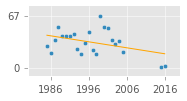

In [95]:
small("Naugatuck","violent-crimes")

In [97]:
def make_all_plots(crimes = col_labels):
    for city in mega_hist.reset_index()["City"].unique():
        for crime in crimes:
            try:
                small(city, crime)
            except:
                print city, crime
                continue
#make_all_plots(crimes=["violent-crimes"])
make_all_plots()

[ -2.05944730e+00   4.41738464e+03]
[ -1.27305760e+00   2.57758899e+03]
[  8.32772544e-03  -1.61417396e+01]
[ -3.63636364e-02   7.43090909e+01]
[ -4.79288856e-01   9.76848607e+02]
[ -7.55347644e-01   1.56350416e+03]
[ -3.36375169e+00   6.80737145e+03]
[ -5.96201085e+00   1.23577311e+04]
[ -2.01957710e+00   4.09500682e+03]
[ -2.40930798e-01   4.87651396e+02]
[ -3.76548212e+00   7.70662652e+03]
[ -1.54811459e-01   3.12136753e+02]
[  9.16422287e-04  -1.80205279e+00]
[  3.63636364e-02  -7.28545455e+01]
[ -2.80425220e-02   5.79428152e+01]
[ -3.00953079e-01   6.09306635e+02]
[ -2.18108504e+00   4.40388563e+03]
[ -6.32231762e+00   1.28689786e+04]
[ -1.39336435e-01   2.84054677e+02]
[  5.09794533e-03  -9.46068808e+00]
[  1.33586651e+00  -2.39848786e+03]
[  2.85100220e-01  -5.65144823e+02]
[  2.01612903e-03  -3.75201613e+00]
[ -5.45454545e-02   1.11327273e+02]
[  1.05664776e-01  -2.06876358e+02]
[ -8.09017595e-01   1.65156470e+03]
[ -8.72379216e-01   1.81499320e+03]
[ -2.90971419e-01   9.587492

In [38]:
def debug_chart(city, crime):

    return mega_hist[(mega_hist.index == city) &
              (mega_hist["crime"] == crime)]

debug_chart("Easton","larceny")

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,...,2014_diff,2014_diff_pct,2014_hist,2014_new,2015,2016,Agency,State,Unnamed: 32,crime
City,,,,,,,,,,,,,,,,,,,,,
